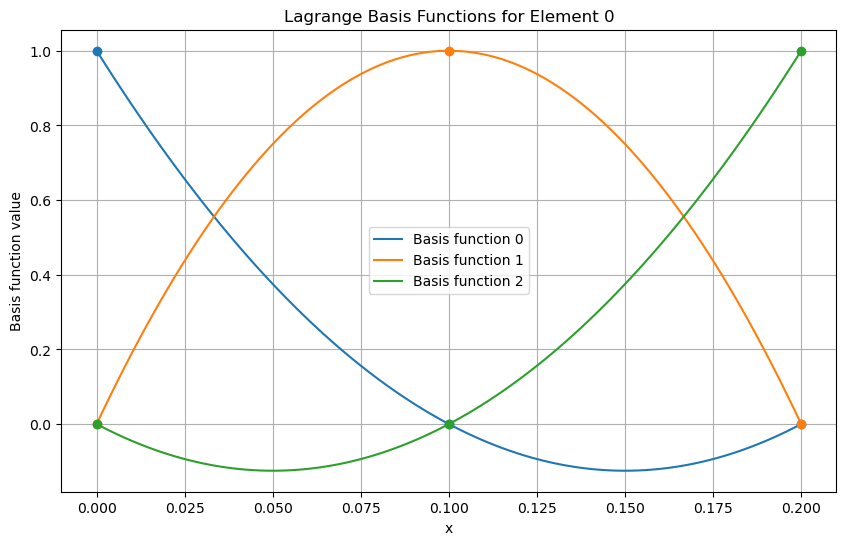

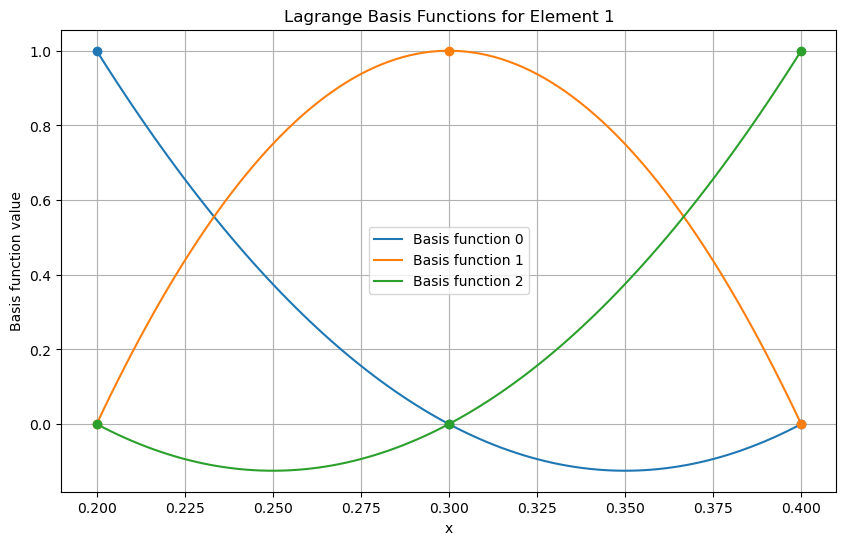

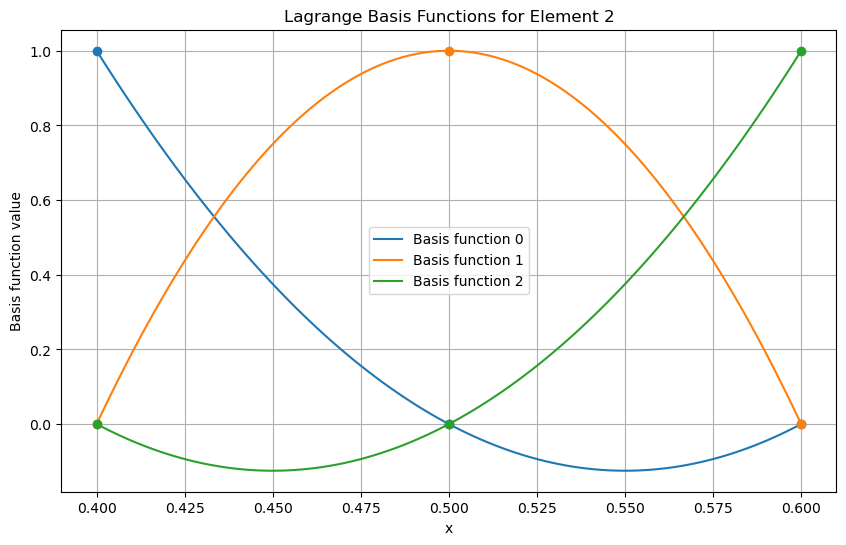

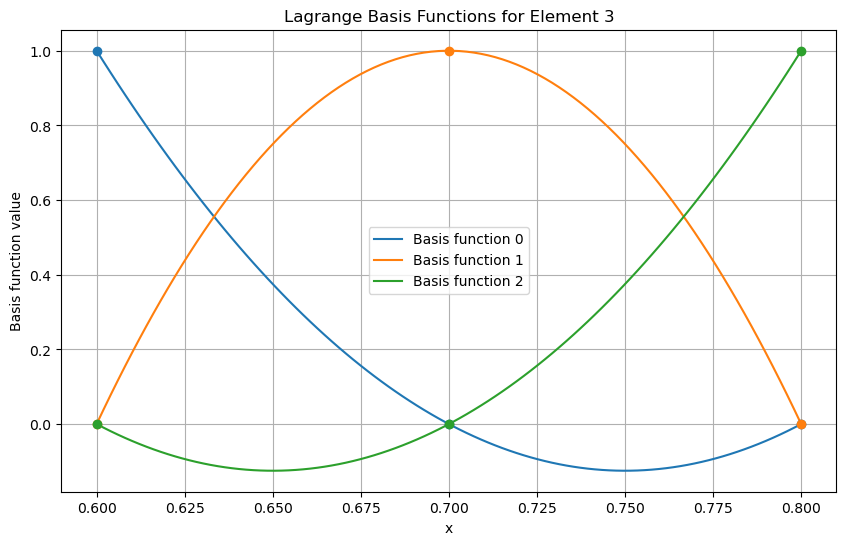

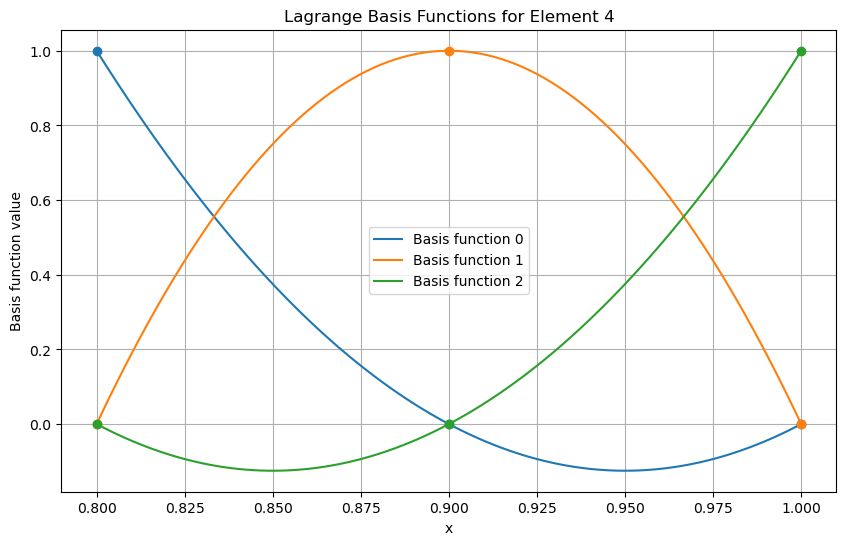

In [38]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

class LagrangeBasis1D:
    def __init__(self, nodes, polynomial_order):
        """
        Initialize the Lagrange basis class.
        
        :param nodes: A list or array of nodes in the mesh.
        :param polynomial_order: The order of the Lagrange polynomial.
        """
        self.nodes = np.array(nodes)
        self.polynomial_order = polynomial_order
        self.elements = self._create_elements()
        self.basis_functions = self._generate_basis_functions()
    
    def _create_elements(self):
        """
        Create elements based on the provided nodes.
        """
        return [(self.nodes[i], self.nodes[i + 1]) for i in range(len(self.nodes) - 1)]
    
    def _generate_basis_functions(self):
        """
        Generate the Lagrange basis functions for each element.
        """
        basis_functions = []
        for elem in self.elements:
            local_nodes = np.linspace(elem[0], elem[1], self.polynomial_order + 1)
            basis_functions.append(self._lagrange_polynomials(local_nodes))
        return basis_functions

    def _lagrange_polynomials(self, local_nodes):
        """
        Compute Lagrange polynomials for the given local nodes.
        
        :param local_nodes: Nodes within the current element.
        :return: A list of Lagrange polynomial functions.
        """
        x = sp.symbols('x')
        basis = []
        for i in range(len(local_nodes)):
            li = 1
            for j in range(len(local_nodes)):
                if i != j:
                    li *= (x - local_nodes[j]) / (local_nodes[i] - local_nodes[j])
            basis.append(sp.simplify(li))
        return basis
    
    def get_basis_functions(self):
        """
        Get the basis functions for all elements.
        
        :return: A nested list of basis functions for each element.
        """
        return self.basis_functions
    
    def plot_basis_functions(self):
        """
        Plot the Lagrange basis functions for each element.
        """
        x = sp.symbols('x')
        for i, elem_basis in enumerate(self.basis_functions):
            local_nodes = np.linspace(self.elements[i][0], self.elements[i][1], self.polynomial_order + 1)
            x_vals = np.linspace(self.elements[i][0], self.elements[i][1], 100)
            plt.figure(figsize=(10, 6))
            for j, bf in enumerate(elem_basis):
                bf_func = sp.lambdify(x, bf, modules=['numpy'])
                y_vals = bf_func(x_vals)
                plt.plot(x_vals, y_vals, label=f'Basis function {j}')
                plt.scatter(local_nodes, bf_func(local_nodes), zorder=5)
            plt.title(f'Lagrange Basis Functions for Element {i}')
            plt.xlabel('x')
            plt.ylabel('Basis function value')
            plt.legend()
            plt.grid(True)
            plt.show()

# Example usage
nodes = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Define the mesh nodes
polynomial_order = 2   # Define the polynomial order

# Create the Lagrange basis object
lagrange_basis = LagrangeBasis1D(nodes, polynomial_order)

# Plot the basis functions
lagrange_basis.plot_basis_functions()


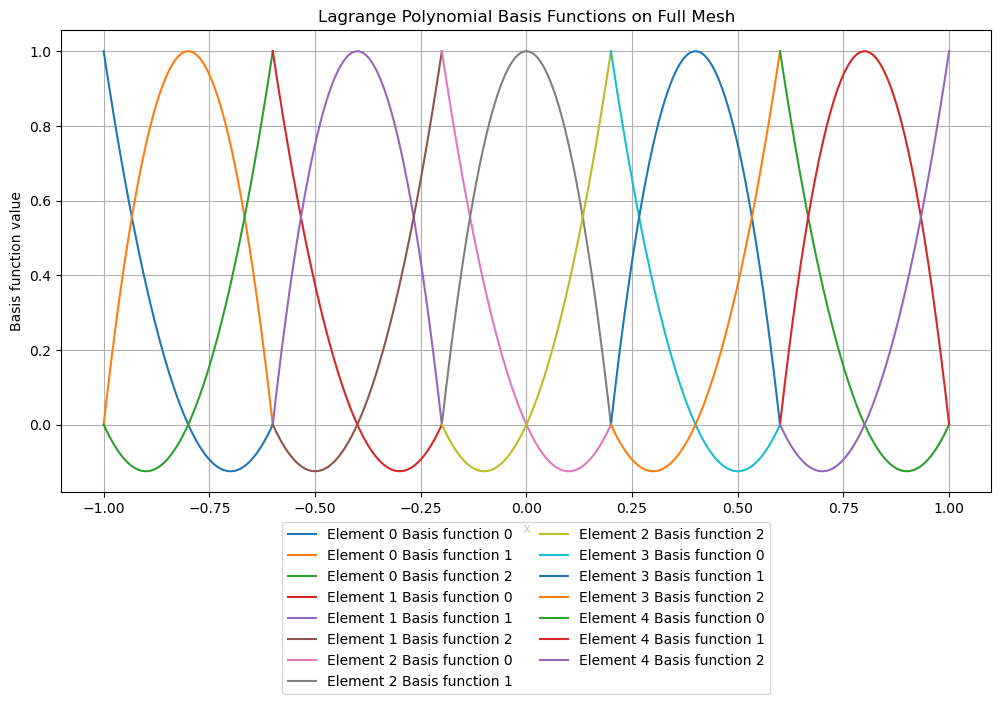

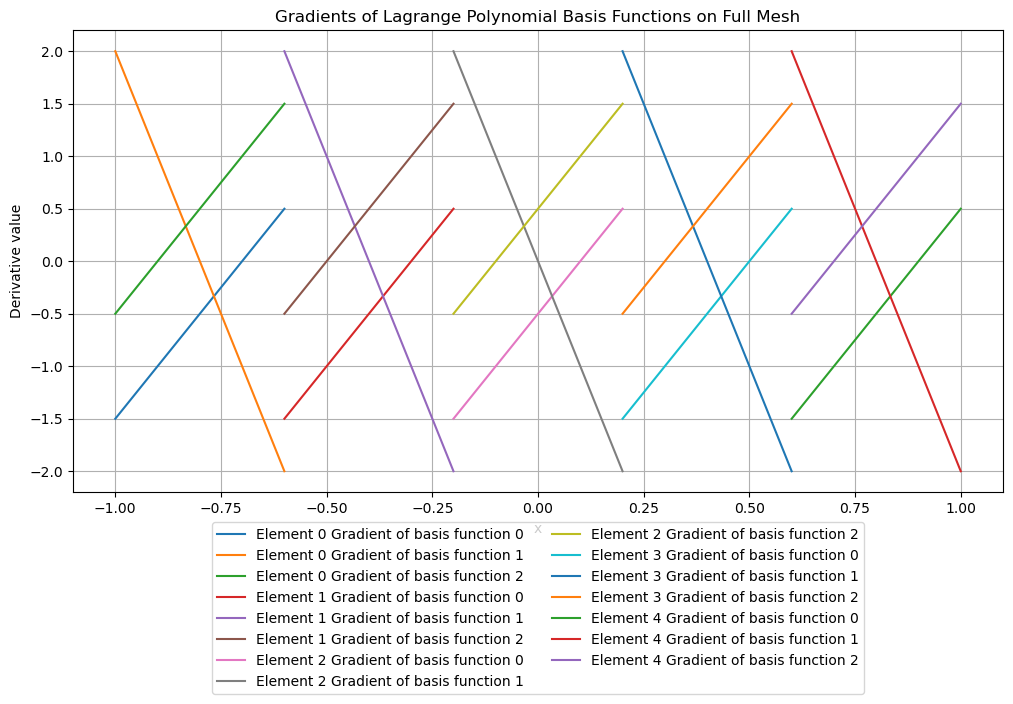

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

class LagrangePolynomialBasis:
    def __init__(self, num_elements, poly_order):
        self.num_elements = num_elements
        self.poly_order = poly_order
        self.nodes = np.linspace(-1, 1, poly_order + 1)
        self.basis_polynomials = [lagrange(self.nodes, np.eye(poly_order + 1)[i]) for i in range(poly_order + 1)]
        self.basis_derivatives = [np.polyder(poly) for poly in self.basis_polynomials]
        self.element_width = 2 / num_elements

    def forward(self, x):
        x = np.asarray(x)
        N = x.shape[0]
        n = self.poly_order + 1
        basis_values = np.zeros((N, n))
        for i, poly in enumerate(self.basis_polynomials):
            basis_values[:, i] = poly(x)
        return basis_values

    def grad(self, x):
        x = np.asarray(x)
        N = x.shape[0]
        n = self.poly_order + 1
        basis_gradients = np.zeros((N, n))
        for i, poly_der in enumerate(self.basis_derivatives):
            basis_gradients[:, i] = np.polyval(poly_der, x)
        return basis_gradients

    def plot_basis(self):
        x_global = np.linspace(-1, 1, 1000)
        plt.figure(figsize=(12, 6))
        
        for elem in range(self.num_elements):
            # Transform local element coordinates to global coordinates
            x_local = np.linspace(-1, 1, 1000)
            x_global_elem = self.element_width * (x_local + 1) / 2 + (-1 + elem * self.element_width)
            basis_values = self.forward(x_local)
            for i in range(basis_values.shape[1]):
                plt.plot(x_global_elem, basis_values[:, i], label=f'Element {elem} Basis function {i}')
        
        plt.title('Lagrange Polynomial Basis Functions on Full Mesh')
        plt.xlabel('x')
        plt.ylabel('Basis function value')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
        plt.grid(True)
        plt.show()

    def plot_gradients(self):
        x_global = np.linspace(-1, 1, 1000)
        plt.figure(figsize=(12, 6))
        
        for elem in range(self.num_elements):
            # Transform local element coordinates to global coordinates
            x_local = np.linspace(-1, 1, 1000)
            x_global_elem = self.element_width * (x_local + 1) / 2 + (-1 + elem * self.element_width)
            basis_gradients = self.grad(x_local)
            for i in range(basis_gradients.shape[1]):
                plt.plot(x_global_elem, basis_gradients[:, i], label=f'Element {elem} Gradient of basis function {i}')
        
        plt.title('Gradients of Lagrange Polynomial Basis Functions on Full Mesh')
        plt.xlabel('x')
        plt.ylabel('Derivative value')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
        plt.grid(True)
        plt.show()

# Example usage:
# Initialize the basis with 4 elements and polynomial order 3
lagrange_basis = LagrangePolynomialBasis(num_elements=5, poly_order=2)

# Plot the basis functions on the full mesh
lagrange_basis.plot_basis()

# Plot the gradients of the basis functions on the full mesh
lagrange_basis.plot_gradients()

In [45]:
p = 3
nodes = np.array(
b1 = scipy.interpolate.lagrange([0,0.5,1],[1,0,0])
b2 = scipy.interpolate.lagrange([0,0.5,1],[0,1,0])
b3 = scipy.interpolate.lagrange([0,0.5,1],[0,0,1])
x = np.linspace(0,1,100)

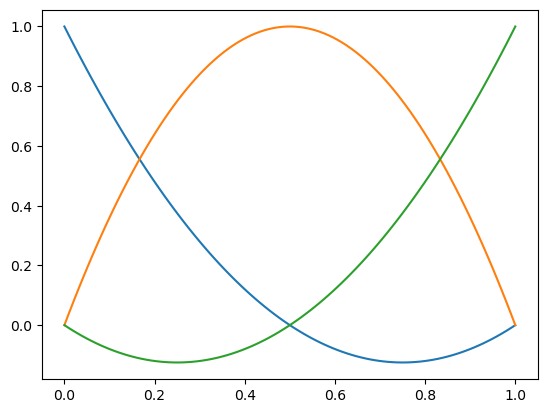

In [50]:
plt.plot(x,b1(x))
plt.plot(x,b2(x))
plt.plot(x,b3(x))

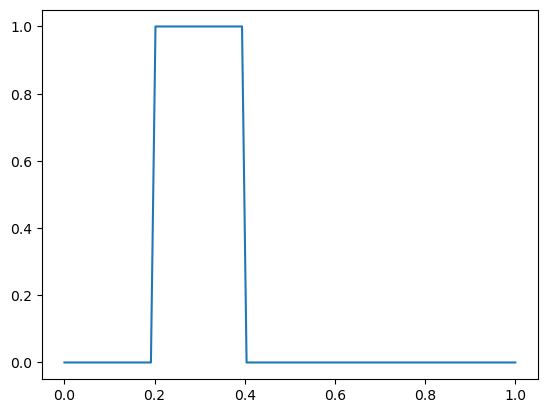

In [52]:
plt.plot(x,(x>0.2)*(x<=0.4))

In [ ]:
class LagrangeBasis1D:
    def __init__(self, h, p):
        self.h = h
        self.p = p
        self.n_elements = (self.h - 1)/self.p
        self.elementwidth = 1/self.n_elements
    
    def forward_local(x):
        